<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/main/FS_Dimension_reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remove outliers before normalization


Have you missed some outliers?
Are there still missing values?
Is the data normalized?

In [3]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap


df = pd.read_csv('num_UMAP_df.csv')
df2 = pd.read_csv('cat_UMAP_df.csv')

In [5]:
df

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
0,0,18,2,5,1,0,1,0.00,0.00,0.00,...,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0
1,1,17,2,2,2,0,1,12.82,6.39,0.00,...,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0
2,2,38,1,2,2,0,1,9.20,0.00,0.00,...,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0
3,3,27,2,3,1,0,2,0.00,13.70,0.00,...,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0
4,4,20,2,5,0,0,2,14.57,40.87,0.00,...,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,30,1,1,1,91,91,0.00,0.00,18.04,...,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0
31871,31884,27,1,1,0,91,91,18.04,0.00,0.00,...,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0
31872,31885,24,1,1,1,91,91,0.00,0.00,0.00,...,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0
31873,31886,34,1,1,0,91,91,0.00,12.03,0.00,...,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0


In [6]:
# df_normalized = df_normalized.drop(columns=['Unnamed: 0'])


# dropping HR 0-23 for grouped columns for time of day,

# first & last order are taken in recency column so dropped

# By order percentage:

# High (>30%): Asian, American
# Medium (10-30%): OTHER, Italian, Japanese
# Low (<10%): remaining cuisines

# By Customer Lifetime Value (CLV) Score:

# High CLV (0.3-0.5)
# Medium CLV (0.2-0.3)
# Low CLV (0.0-0.2)

# By Age Group:

# <18
# 18-24
# 25-34
# 35-44
# 45-54
# 55+

# By Loyalty Rank:

# High (4.0 - 8.0)
# Medium (2.0 - 4.0)
# Low (0.0 - 2.0)

import pandas as pd

# Assuming df is your original DataFrame
df_copy = df.copy()

# Define columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
                   'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
                   'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
                   'HR_22', 'HR_23', 'first_order', 'last_order', 'customer_age']

# # CLV Score
# df['CLV_Group'] = pd.cut(df['CLV_Score'], bins=[0, 0.2, 0.3, 0.5], labels=['Low', 'Medium', 'High'])


# # Loyalty Rank
# df['Loyalty_Group'] = pd.cut(df['Loyalty_Rank'], bins=[0, 2, 4, 8], labels=['Low', 'Medium', 'High'])

# , 'CUI_Asian', 'CUI_American', 'CUI_OTHER', 'CUI_Italian', 'CUI_Japanese', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
                    #  'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
                    #  'CUI_Street_Food/Snacks', 'CUI_Thai'

# # Define cuisine groups
# high_freq_cuisines = ['CUI_Asian', 'CUI_American']
# medium_freq_cuisines = ['CUI_OTHER', 'CUI_Italian', 'CUI_Japanese']
# low_freq_cuisines = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
#                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
#                      'CUI_Street_Food/Snacks', 'CUI_Thai']

# # Create Age Group column
df_copy['Age_Group'] = pd.cut(df_copy['customer_age'], bins=[0, 18, 24, 34, 44, 54, 100], labels=['<18', '18-24', '25-34', '35-44', '45-54', '55+'])

# # Create a new column 'cuisine_group'
# def assign_cuisine_group(row):
#     if any(row[col] == 1 for col in high_freq_cuisines):
#         return '1'
#     elif any(row[col] == 1 for col in medium_freq_cuisines):
#         return '2'
#     else:
#         return '3'

# df_copy['cuisine_group'] = df_copy.apply(assign_cuisine_group, axis=1)

# Drop the specified columns
df_grouped = df_copy.drop(columns=columns_to_drop)

df_grouped

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,...,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.020362,0.092846,0,0,0,0,2,0,<18
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,...,0.250000,0.013544,0.090596,0,0,2,0,0,0,<18
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.006487,0.088267,0,0,2,0,0,0,35-44
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,...,0.166667,0.022252,0.066010,0,0,1,1,0,0,25-34
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,...,0.166667,0.039088,0.071566,0,0,2,0,0,0,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,...,0.250000,0.012719,0.416697,0,0,0,1,0,0,25-34
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.012719,0.416697,0,0,0,0,1,0,25-34
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.012543,0.416639,0,1,0,0,0,0,18-24
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,...,0.250000,0.008482,0.415299,0,0,1,0,0,0,25-34


In [26]:

# By Customer Region (Order %):

# Regions: 8670, 4660, 2360
# Order % Range: 27.7% to 30.62%

# Regions: 2440, 4140, 8370, 8550
# Order % Range: 0,04 to 4.65%

# Define the regions (as strings)
main_regions = ['8670', '4660', '2360']
other_regions = ['2440', '4140', '8370', '8550']

# Create new columns for main regions
for region in main_regions:
    df2[f'Region_{region}'] = (df2['customer_region'] == region).astype(int)

# Create a single column for other regions
df2['Region_Other'] = (df2['customer_region'].isin(other_regions)).astype(int)

# If the customer_region contains a string like 'Region_8670',
# extract the numeric part:
df2['Region_Numeric'] = df2['customer_region'].str.extract('(\d+)')

# Now use the numeric region for comparison
for region in main_regions:
    df2[f'Region_{region}'] = (df2['Region_Numeric'] == region).astype(int)

df2['Region_Other'] = (df2['Region_Numeric'].isin(other_regions)).astype(int)

# Drop temporary and original columns
cat_df_grouped = df2.drop(columns=['customer_region', 'Region_Numeric'])

cat_df_grouped.head()

,Unnamed: 0,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,DELIVERY,DIGI,0,0,1,0
1,1,DISCOUNT,DIGI,1,0,0,0
2,2,DISCOUNT,CASH,0,1,0,0
3,3,DELIVERY,DIGI,0,1,0,0
4,4,-,DIGI,0,1,0,0


In [27]:
# Merge the two DataFrames on 'Unnamed: 0'
merged_df = pd.merge(df_grouped, cat_df_grouped, on='Unnamed: 0', how='inner')

# Print the merged DataFrame
merged_df

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,<18,DELIVERY,DIGI,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,<18,DISCOUNT,DIGI,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,35-44,DISCOUNT,CASH,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,25-34,DELIVERY,DIGI,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,18-24,-,DIGI,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,25-34,FREEBIE,DIGI,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,25-34,DELIVERY,DIGI,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,18-24,-,DIGI,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,25-34,DISCOUNT,DIGI,1,0,0,0


In [21]:
for col in ['Age_Group', 'last_promo', 'payment_method']:
  print(f"Unique values for {col}: {merged_df[col].unique()}")

Unique values for Age_Group: ['<18', '35-44', '25-34', '18-24', '45-54', '55+']
Categories (6, object): ['<18' < '18-24' < '25-34' < '35-44' < '45-54' < '55+']
Unique values for last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values for payment_method: ['DIGI' 'CASH' 'CARD']


In [9]:
import pandas as pd

# Assuming encoded_df is your DataFrame
encoded_df = pd.get_dummies(merged_df,
                            columns=['payment_method', 'Age_Group',
                                     'Age_Group', 'last_promo'])
# Specify all columns to one-hot encode

encoded_df = encoded_df.drop(columns=['Unnamed: 0'])

In [31]:
import pandas as pd

# Create mapping dictionaries
age_group_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

last_promo_mapping = {
    '-': 0,        # Using '-' as baseline
    'DELIVERY': 1,
    'DISCOUNT': 2,
    'FREEBIE': 3
}

payment_method_mapping = {
    'CASH': 0,     # Arbitrary ordering
    'CARD': 1,
    'DIGI': 2
}

def encode_categories(df):
    """
    Encode categorical variables in the dataframe using the defined mappings
    and drop the original columns

    Parameters:
    df (pandas.DataFrame): DataFrame containing the categorical columns

    Returns:
    pandas.DataFrame: DataFrame with encoded columns and original columns dropped
    """
    df_encoded = df.copy()

    # Dictionary to store columns to be encoded
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping,
        'payment_method': payment_method_mapping
    }

    # Encode each column and drop original
    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            # Create new encoded column with the original name (without '_encoded' suffix)
            df_encoded[col] = df_encoded[col].map(mapping)

    return df_encoded

# Example usage:
df_encoded = encode_categories(merged_df)

In [32]:
pd.set_option('display.max_columns', None)
df_encoded

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,0,1,2,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,0,2,2,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,3,2,0,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,2,1,2,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,1,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,2,3,2,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,2,1,2,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,1,0,2,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,2,2,2,1,0,0,0


In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    """
    Complete preprocessing pipeline with median imputation,
    IQR-based outlier removal, and standardization
    """
    # Store original column names
    original_columns = df.columns

    # Drop non-numeric columns
    df_numeric = df.select_dtypes(include='number')

    # 1. Median Imputation
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(
        imputer.fit_transform(df_numeric),
        columns=df_numeric.columns
    )

    # 2. Outlier Removal using 3 IQR
    Q1 = df_imputed.quantile(0.25)
    Q3 = df_imputed.quantile(0.75)
    IQR = Q3 - Q1

    # Create mask for values within 3 IQR
    mask = ~((df_imputed < (Q1 - 3 * IQR)) | (df_imputed > (Q3 + 3 * IQR))).any(axis=1)
    df_clean = df_imputed[mask]

    # 3. Standardization
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_clean),
        columns=df_numeric.columns
    )

    return df_scaled, mask

# Function to get preprocessing stats
def get_preprocessing_stats(original_df, final_df, mask):
    stats = {
        'original_rows': len(original_df),
        'rows_after_outlier_removal': len(final_df),
        'outliers_removed': len(original_df) - len(final_df),
        'outlier_percentage': (1 - len(final_df)/len(original_df)) * 100
    }
    return stats

# Example usage:
df_scaled, mask = preprocess_data(encoded_df)
stats = get_preprocessing_stats(encoded_df, df_scaled, mask)
print(stats)

{'original_rows': 31875, 'rows_after_outlier_removal': 2425, 'outliers_removed': 29450, 'outlier_percentage': 92.3921568627451}


In [40]:
df_scaled

,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Region_8670,Region_4660,Region_2360,Region_Other
0,1.253735,0.205218,0.971892,1.261811,-0.359494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.034381,-0.407907,-0.450183,-0.450196,-0.510653,-0.507081,1.492067,0.511679,0.385742,-0.204225,-0.518959,0.794129,2.017652,-0.532781,2.307986,-0.485494,-0.659724,0.794129,0.385742,0.434150,0.0,0.0,1.855893,-0.608040,-0.689633,0.0,1.267883,-0.908119,-0.403128,0.0
1,-0.369494,0.205218,0.971892,0.693585,-0.915455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.034381,-0.407907,-0.450183,-0.450196,-0.510653,-0.507081,1.492067,0.511679,-0.602624,-0.964872,-0.518959,0.794129,2.017652,-0.532781,-0.138197,1.863917,-0.659724,0.794129,-0.602624,0.375929,0.0,0.0,1.855893,-0.608040,-0.689633,0.0,-0.788716,1.101177,-0.403128,0.0
2,1.253735,2.871216,-1.094603,1.536506,2.640428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.411516,1.866058,-0.450183,-0.450196,-0.510653,-0.507081,1.492067,0.511679,3.963017,2.552359,3.683116,0.075041,1.978429,-0.483702,2.307986,-0.485494,-0.657813,0.075041,3.963017,-0.041568,0.0,0.0,1.855893,-0.608040,-0.689633,0.0,-0.788716,1.101177,-0.403128,0.0
3,-0.369494,0.205218,0.971892,0.549174,-0.915455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.411516,-0.407907,-0.450183,-0.450196,1.496370,-0.507081,1.492067,0.511679,-0.693463,-1.034851,-0.518959,-0.644047,1.860762,-0.336467,-0.138197,1.863917,-0.651817,-0.644047,-0.693463,-1.000150,0.0,0.0,-0.718051,-0.608040,1.830878,0.0,-0.788716,1.101177,-0.403128,0.0
4,-0.369494,1.093884,0.971892,1.051473,-0.915455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.411516,-0.407907,-0.450183,-0.450196,-0.510653,1.469883,1.492067,0.511679,-0.377502,-0.791444,0.881733,-1.054954,1.546982,0.056162,-0.138197,1.863917,-0.633601,-1.054954,-0.377502,-1.364763,0.0,0.0,-0.718051,-0.608040,1.830878,0.0,-0.788716,1.101177,-0.403128,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,-0.369494,0.205218,-0.061356,-0.750525,0.634969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.411516,-0.407907,-0.450183,-0.450196,1.496370,-0.507081,-0.512510,-0.552491,0.248497,1.046279,2.282425,0.794129,-1.433925,-0.581860,-0.138197,-0.485494,4.384837,0.794129,0.248497,3.085204,0.0,0.0,-0.718051,-0.608040,0.570623,0.0,-0.788716,1.101177,-0.403128,0.0
2421,-0.369494,0.205218,-0.061356,2.030957,-0.915455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.411516,-0.407907,-0.450183,-0.450196,1.496370,-0.507081,-0.512510,-0.552491,0.238623,1.031066,2.282425,0.794129,-1.433925,-0.581860,-0.138197,-0.485494,4.384837,0.794129,0.238623,3.084623,0.0,0.0,-0.718051,-0.608040,0.570623,0.0,-0.788716,1.101177,-0.403128,0.0
2422,-0.369494,-0.683448,-0.061356,2.209901,-0.915455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.411516,-0.407907,-0.450183,-0.450196,1.496370,-0.507081,-0.512510,-0.552491,0.351184,1.204493,-0.518959,0.794129,-1.433925,-0.581860,-0.138197,-0.485494,4.384837,0.794129,0.351184,3.091253,0.0,0.0,-0.718051,-0.608040,0.570623,0.0,-0.788716,1.101177,-0.403128,0.0
2423,-0.369494,0.205218,-1.094603,-0.750525,1.060422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.411516,-0.407907,-0.450183,-0.450196,1.496370,-0.507081,-0.512510,-0.552491,0.731325,1.790191,2.282425,0.794129,-1.433925,-0.581860,-0.138197,-0.485494,4.384837,0.794129,0.731325,3.113646,0.

In [ ]:
# # List of column pairs with correlation > 0.8
# high_corr_pairs = []

# for i in range(len(df_corr.columns)):
#     for j in range(i):
#         if abs(df_corr.iloc[i, j]) > 0.8:
#             high_corr_pairs.append((df_corr.columns[i], df_corr.columns[j]))

# print("Correlation Matrix:")
# df_corr.round(2)

# print("\nColumn Pairs with Correlation > 0.8:")
# for pair in high_corr_pairs:
#     print(f"{pair[0]} and {pair[1]}")

NameError: name 'df_corr' is not defined

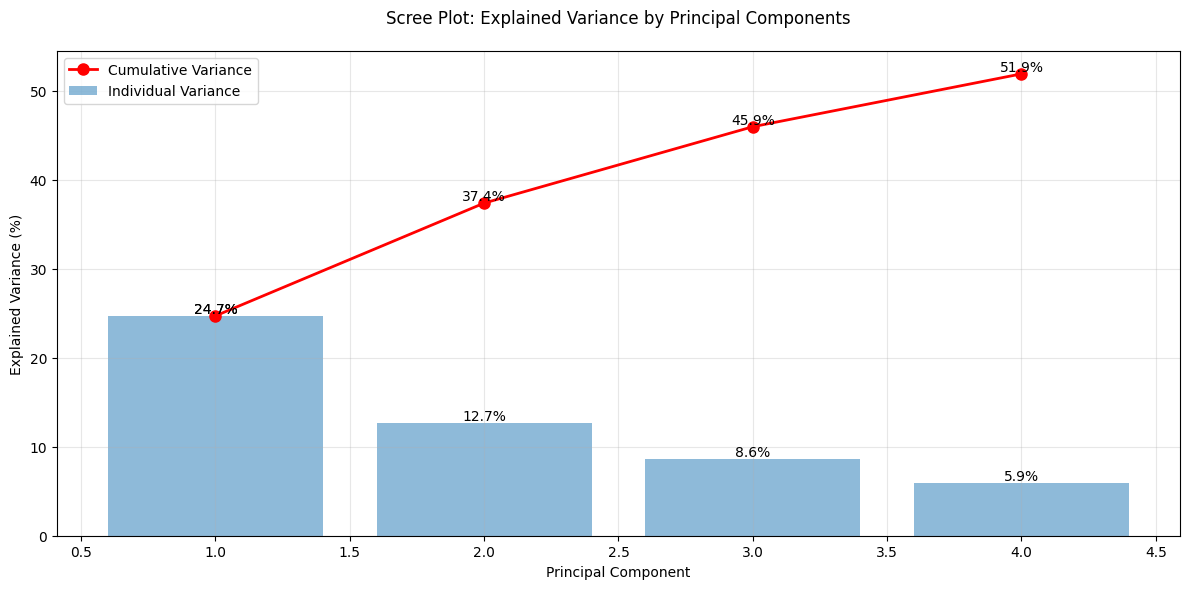

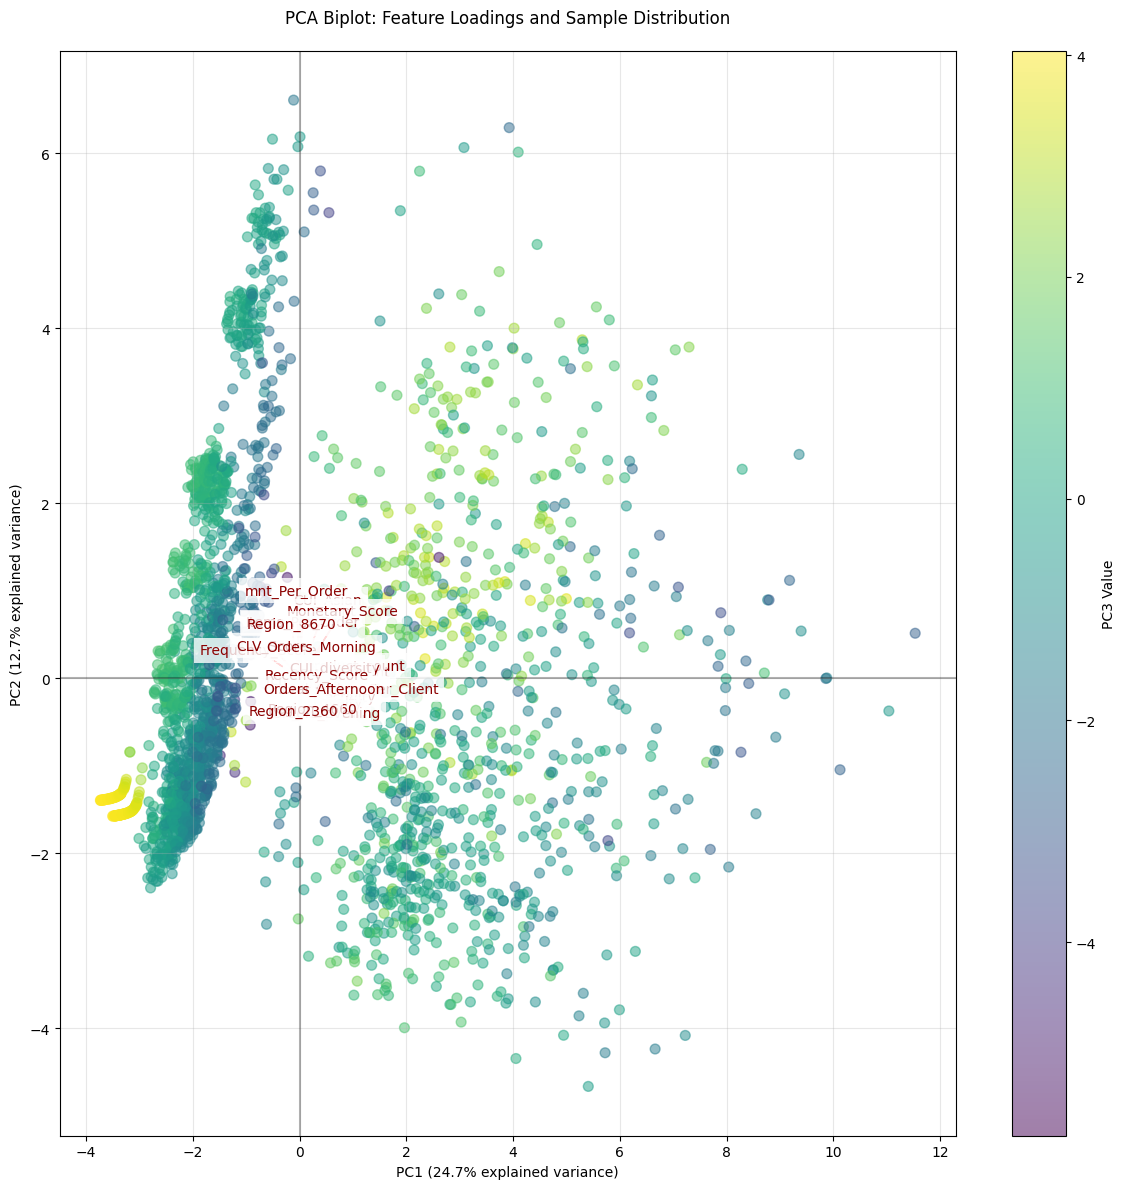


Principal Component Analysis Summary:
Total variance explained by 4 components: 51.9%

Principal Component 1 (24.7% variance explained):

Significant loadings (abs > 0.2):
Total_Orders_Per_Client: 0.340
product_count: 0.331
activity: 0.297
vendor_count: 0.255
mnt: 0.250
Monetary_Score: 0.250
Frequency_Score: -0.243
frq: -0.243
Loyalty: 0.227
is_chain: 0.226
CUI_diversity: 0.205

Principal Component 2 (12.7% variance explained):

Significant loadings (abs > 0.2):
mnt_Per_Order: 0.440
CUI_Asian: 0.392
mnt: 0.336
Monetary_Score: 0.336
Items_Per_Order: 0.280
Region_8670: 0.274

Principal Component 3 (8.6% variance explained):

Significant loadings (abs > 0.2):
Region_8670: 0.401
CLV_Score: -0.386
Region_4660: -0.383
Frequency_Score: -0.342
frq: -0.342
Orders_Evening: -0.242
Orders_Morning: 0.223
CUI_diversity: -0.223
CUI_American: -0.213

Principal Component 4 (5.9% variance explained):

Significant loadings (abs > 0.2):
Recency_Score: 0.461
rcn: -0.397
CLV_Score: 0.351
Orders_Morning: 0.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2):
    """
    Perform PCA analysis with enhanced visualizations and insights

    Args:
        df_scaled: Scaled/normalized DataFrame
        n_components: Number of PCA components to calculate
        loading_threshold: Threshold for considering significant loadings
    """
    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df_scaled)

    # Create DataFrame for principal components
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )

    # Calculate explained variance and cumulative variance
    explained_variance = pca.explained_variance_ratio_ * 100
    cumulative_variance = np.cumsum(explained_variance)

    # 1. Enhanced Scree Plot
    plt.figure(figsize=(12, 6))

    # Plot bars for individual variance
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)

    # Plot line for cumulative variance
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
             'ro-', linewidth=2, markersize=8)

    plt.grid(True, alpha=0.3)
    plt.title('Scree Plot: Explained Variance by Principal Components', pad=20)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance (%)')

    # Add value labels
    for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
        plt.text(i+1, ev, f'{ev:.1f}%', ha='center', va='bottom')
        plt.text(i+1, cv, f'{cv:.1f}%', ha='center', va='bottom')

    plt.legend(['Cumulative Variance', 'Individual Variance'])
    plt.tight_layout()
    plt.savefig('scree_plot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 2. Enhanced Biplot
    plt.figure(figsize=(12, 12))

    # Calculate loadings and scale them for visualization
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Create scatter plot of samples
    scatter = plt.scatter(principal_components[:,0], principal_components[:,1],
                         c=principal_components[:,2], cmap='viridis',
                         alpha=0.5, s=50)
    plt.colorbar(scatter, label='PC3 Value')

    # Plot loadings (feature vectors)
    for i, (feature, loading) in enumerate(zip(df_scaled.columns, loadings)):
        # Only plot significant loadings
        if abs(loading[0]) > loading_threshold or abs(loading[1]) > loading_threshold:
            plt.arrow(0, 0, loading[0], loading[1],
                     color='r', alpha=0.5, head_width=0.05)

            # Adjust text position for better readability
            text_x = loading[0] * 1.15
            text_y = loading[1] * 1.15

            # Add background to text for better visibility
            plt.text(text_x, text_y, feature,
                    color='darkred', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    plt.grid(True, alpha=0.3)
    plt.xlabel(f'PC1 ({explained_variance[0]:.1f}% explained variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.1f}% explained variance)')
    plt.title('PCA Biplot: Feature Loadings and Sample Distribution', pad=20)

    # Add axis lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.savefig('biplot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 3. Print detailed loadings analysis
    print("\nPrincipal Component Analysis Summary:")
    print(f"Total variance explained by {n_components} components: {cumulative_variance[-1]:.1f}%")

    for i in range(n_components):
        print(f"\nPrincipal Component {i+1} ({explained_variance[i]:.1f}% variance explained):")

        # Sort loadings by absolute value
        loadings_dict = dict(zip(df_scaled.columns, pca.components_[i]))
        sorted_loadings = sorted(loadings_dict.items(),
                               key=lambda x: abs(x[1]),
                               reverse=True)

        # Print significant loadings
        print("\nSignificant loadings (abs > {}):".format(loading_threshold))
        for feature, loading in sorted_loadings:
            if abs(loading) > loading_threshold:
                print(f"{feature}: {loading:.3f}")

    return pca_df, pca

# Example usage:
pca_df, pca_model = perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2)

<ipython-input-61-115fc6ce1aae>:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


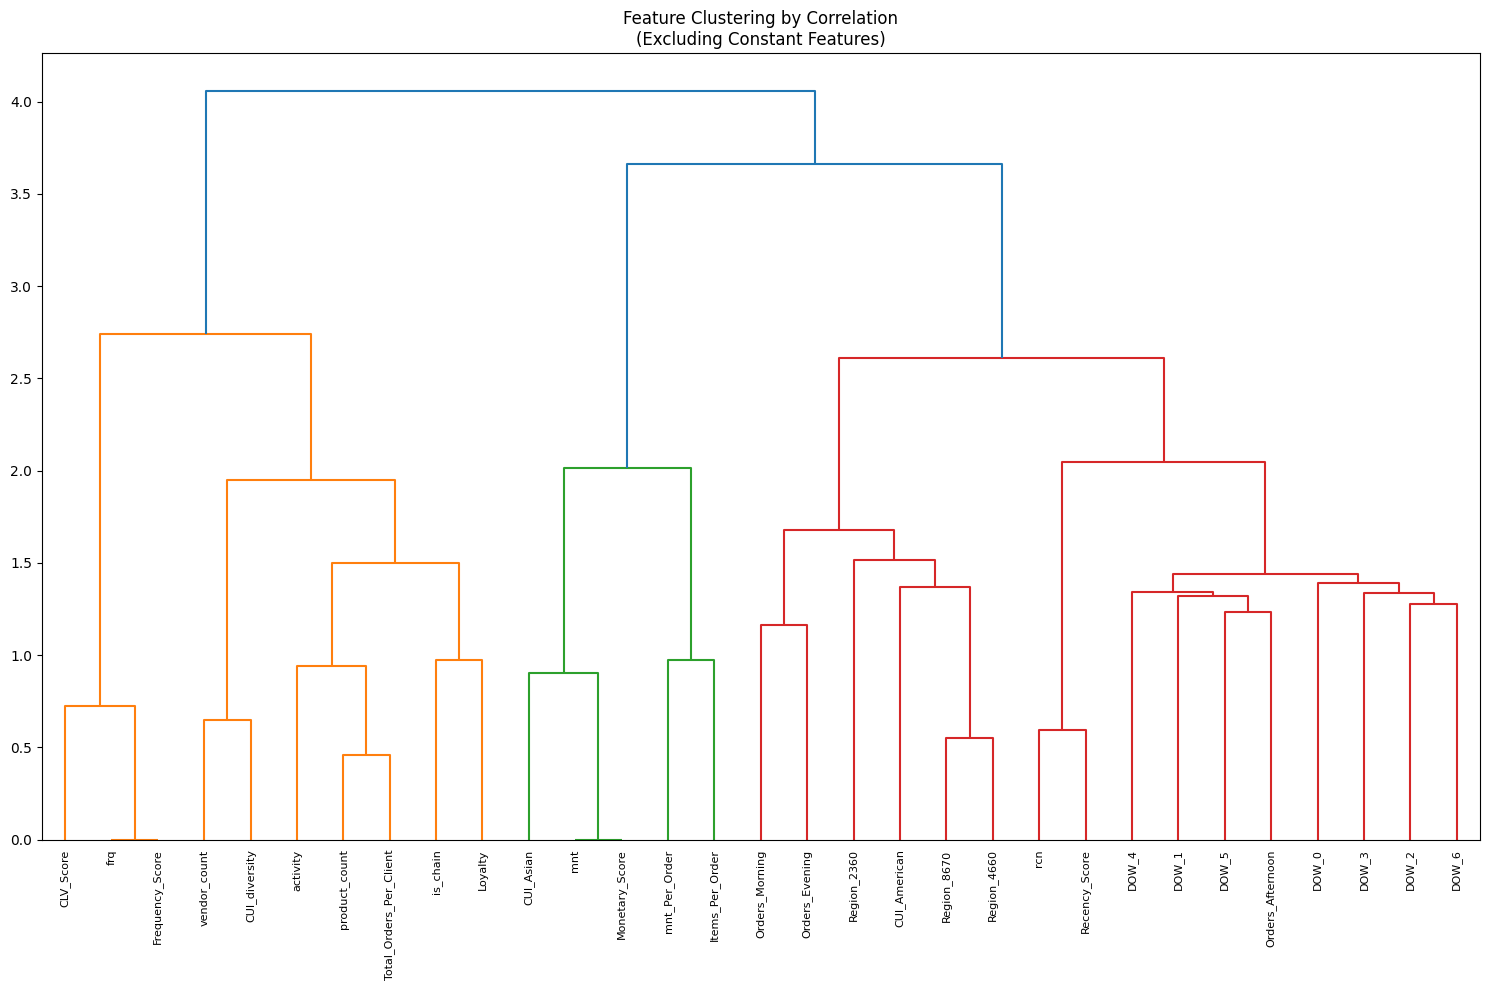

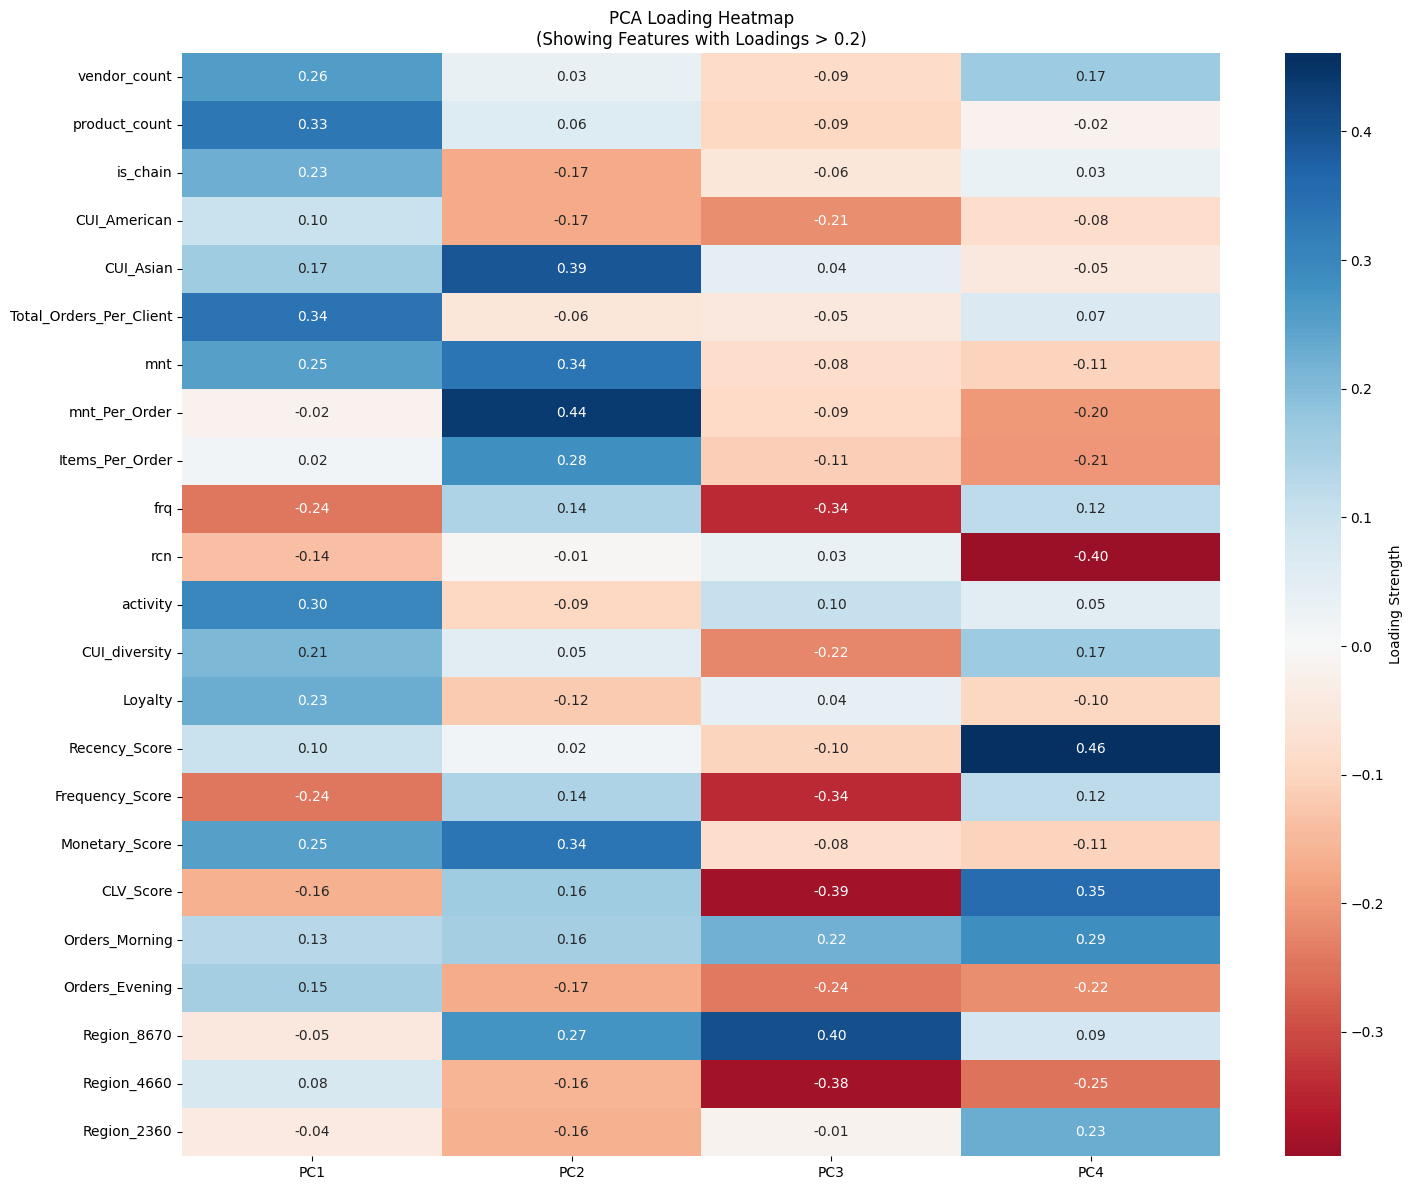

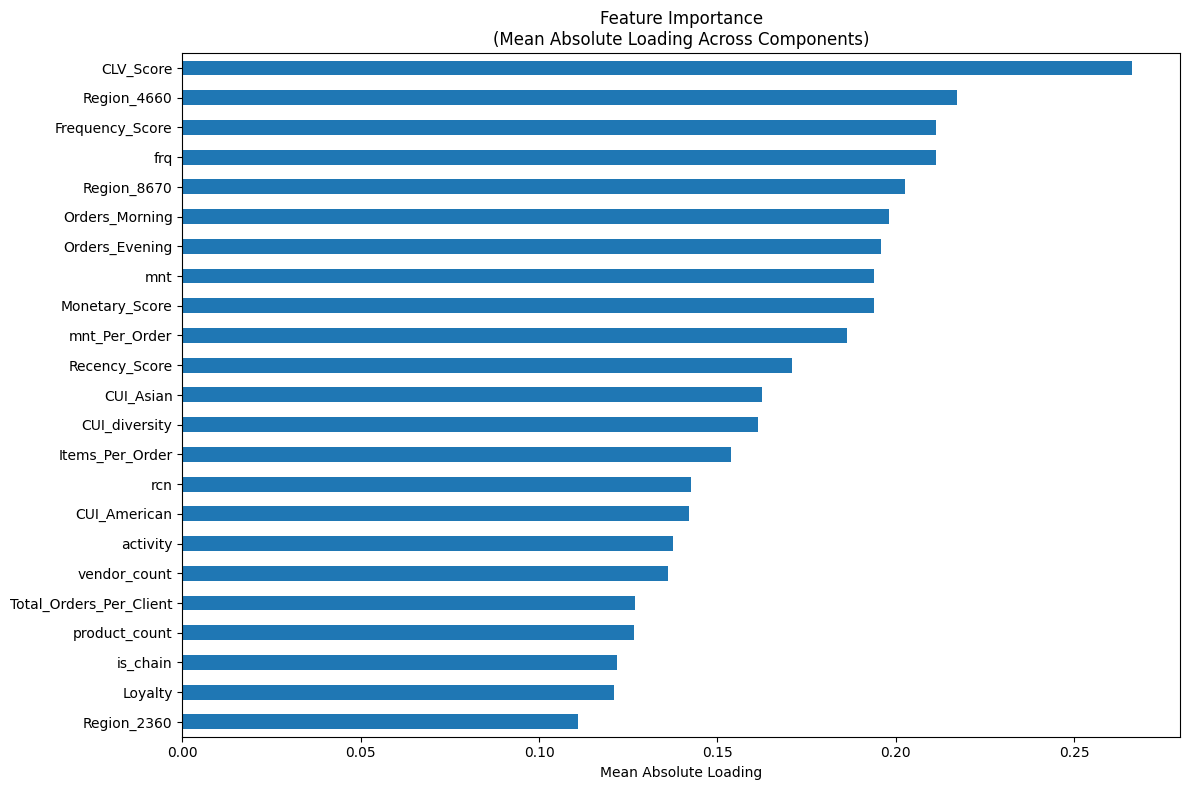


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

Based on the analysis, you could reduce dimensions by:

1. Order/Activity Metrics - combine into a single metric:
   - Total_Orders_Per_Client
   - product_count
   - activity
   - vendor_count

2. Monetary Metrics - combine into a single value metric:
   - mnt
   - Monetary_Score
   - mnt_Per_Order

3. Regional Features - consider using one primary region indicator:
   - Region_8670
   - Region_4660
   - Region_2360

4. Time-based Features - combine into time preference metrics:
   - Orders_Morning
   - Orders_Evening

5. Consider dropping low importance features (loading < 0.1):


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    """
    Plot feature relationships with handling for infinite/nan values
    """
    # Create separate figures for better control
    plt.figure(figsize=(15, 10))

    # Handle infinite values in correlation matrix
    correlation_matrix_clean = correlation_matrix.fillna(0)

    # Filter out features with zero variance (constant features)
    var_mask = correlation_matrix_clean.var() != 0
    correlation_matrix_filtered = correlation_matrix_clean.loc[var_mask, var_mask]

    # Create distance matrix
    distance_matrix = 1 - np.abs(correlation_matrix_filtered)

    try:
        # Create linkage matrix for hierarchical clustering
        linkage_matrix = linkage(distance_matrix, method='ward')

        # Plot dendrogram
        dendrogram(linkage_matrix, labels=correlation_matrix_filtered.columns,
                  leaf_rotation=90)
        plt.title('Feature Clustering by Correlation\n(Excluding Constant Features)')
        plt.tight_layout()
        plt.savefig('feature_clustering.svg', format='svg', bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Could not create dendrogram due to: {str(e)}")
        print("Proceeding with heatmap visualization...")

    # Plot loading heatmap
    plt.figure(figsize=(15, 12))

    # Filter out near-zero loadings for clarity
    loadings_plot = loadings.iloc[:, :-1].copy()  # Exclude 'pattern' column
    significant_features = (loadings_plot.abs() > 0.2).any(axis=1)
    loadings_significant = loadings_plot[significant_features]

    # Create heatmap
    sns.heatmap(loadings_significant,
                annot=True,
                cmap='RdBu',
                center=0,
                fmt='.2f',
                cbar_kws={'label': 'Loading Strength'})

    plt.title('PCA Loading Heatmap\n(Showing Features with Loadings > 0.2)')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('loading_heatmap.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Additional visualization: Feature importance plot
    plt.figure(figsize=(12, 8))

    # Calculate overall importance (mean absolute loading across components)
    importance = loadings_plot.abs().mean(axis=1)
    importance = importance[importance > 0.1]  # Filter out low importance features
    importance = importance.sort_values(ascending=True)

    # Create horizontal bar plot
    importance.plot(kind='barh')
    plt.title('Feature Importance\n(Mean Absolute Loading Across Components)')
    plt.xlabel('Mean Absolute Loading')
    plt.tight_layout()
    plt.savefig('feature_importance.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")
    print("\nBased on the analysis, you could reduce dimensions by:")

    # Group 1: Order/Activity Metrics
    print("\n1. Order/Activity Metrics - combine into a single metric:")
    print("   - Total_Orders_Per_Client")
    print("   - product_count")
    print("   - activity")
    print("   - vendor_count")

    # Group 2: Monetary Metrics
    print("\n2. Monetary Metrics - combine into a single value metric:")
    print("   - mnt")
    print("   - Monetary_Score")
    print("   - mnt_Per_Order")

    # Group 3: Regional Features
    print("\n3. Regional Features - consider using one primary region indicator:")
    print("   - Region_8670")
    print("   - Region_4660")
    print("   - Region_2360")

    # Group 4: Time-based Features
    print("\n4. Time-based Features - combine into time preference metrics:")
    print("   - Orders_Morning")
    print("   - Orders_Evening")

    # Low importance features
    print("\n5. Consider dropping low importance features (loading < 0.1):")
    low_importance = importance[importance < 0.1].index.tolist()
    for feature in low_importance:
        print(f"   - {feature}")


# Example usage:
plot_feature_relationships_fixed(corr_matrix, loadings)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    # [Previous code remains the same until the print statements]

    # Calculate overall importance (mean absolute loading across components)
    loadings_plot = loadings.iloc[:, :-1].copy()  # Exclude 'pattern' column
    importance = loadings_plot.abs().mean(axis=1)

    # Sort all features by importance
    importance_sorted = importance.sort_values(ascending=True)

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")
    print("\nBased on the analysis, you could reduce dimensions by:")

    # [Previous group prints remain the same]

    # Print features by importance thresholds
    print("\n=== FEATURE IMPORTANCE BREAKDOWN ===")

    # Very low importance features (< 0.1)
    print("\n5a. Very Low Importance Features (loading < 0.1):")
    very_low_importance = importance_sorted[importance_sorted < 0.1]
    for feature, value in very_low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Low importance features (0.1 - 0.2)
    print("\n5b. Low Importance Features (0.1 <= loading < 0.2):")
    low_importance = importance_sorted[(importance_sorted >= 0.1) & (importance_sorted < 0.2)]
    for feature, value in low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Medium importance features (0.2 - 0.3)
    print("\n5c. Medium Importance Features (0.2 <= loading < 0.3):")
    medium_importance = importance_sorted[(importance_sorted >= 0.2) & (importance_sorted < 0.3)]
    for feature, value in medium_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # High importance features (>= 0.3)
    print("\n5d. High Importance Features (loading >= 0.3):")
    high_importance = importance_sorted[importance_sorted >= 0.3]
    for feature, value in high_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Summary statistics
    print("\n=== SUMMARY STATISTICS ===")
    print(f"Total features: {len(importance_sorted)}")
    print(f"Features with loading < 0.1: {len(very_low_importance)}")
    print(f"Features with loading 0.1-0.2: {len(low_importance)}")
    print(f"Features with loading 0.2-0.3: {len(medium_importance)}")
    print(f"Features with loading >= 0.3: {len(high_importance)}")

    return importance_sorted

# Example usage:
importance_sorted = plot_feature_relationships_fixed(corr_matrix, loadings)


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

Based on the analysis, you could reduce dimensions by:

=== FEATURE IMPORTANCE BREAKDOWN ===

5a. Very Low Importance Features (loading < 0.1):
   - Region_Other: 0.000
   - Orders_Dusk: 0.000
   - Orders_Dawn: 0.000
   - Orders_Night: 0.000
   - CUI_Street_Food/Snacks: 0.000
   - CUI_Noodle_Dishes: 0.000
   - CUI_Thai: 0.000
   - CUI_Japanese: 0.000
   - CUI_Italian: 0.000
   - CUI_Healthy: 0.000
   - CUI_OTHER: 0.000
   - CUI_Desserts: 0.000
   - CUI_Indian: 0.000
   - CUI_Chinese: 0.000
   - CUI_Chicken_Dishes: 0.000
   - CUI_Cafe: 0.000
   - CUI_Beverages: 0.000
   - DOW_0: 0.038
   - DOW_6: 0.052
   - DOW_1: 0.058
   - DOW_2: 0.058
   - Orders_Afternoon: 0.062
   - DOW_4: 0.063
   - DOW_5: 0.068
   - DOW_3: 0.072

5b. Low Importance Features (0.1 <= loading < 0.2):
   - Region_2360: 0.111
   - Loyalty: 0.121
   - is_chain: 0.122
   - product_count: 0.127
   - Total_Orders_Per_Client: 0.127
   - vendor_count: 0.136
   - activity: 0.137

PCA analysis finetunen met elbow point ETC

**List features with near-zero loadings across multiple PCs.**

Example: CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle_Dishes, CUI_OTHER, CUI_Street_Food/Snacks, CUI_Thai, Orders_Night, Orders_Dawn, Orders_Dusk, mnt_Per_Order, Items_Per_Order, frq, rcn, Recency_Score, Frequency_Score, Monetary_Score, CLV_Score.

**Combine Related Features:**

Cuisine Categories: Combine CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, etc., into a single feature like CUI_General.

Temporal Ordering: Combine Orders_Night, Orders_Dawn, Orders_Dusk into a single feature like Orders_Inactive_Periods.

RFM Scores: Combine Recency_Score, Frequency_Score, Monetary_Score into a single RFM_Score.

**Drop Irrelevant Features:**

Drop features that are not contributing to the variance and are not related to other features.

Example: mnt_Per_Order, Items_Per_Order, frq, rcn, CLV_Score.

In [ ]:
# drop more and do T-SNE to compare

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


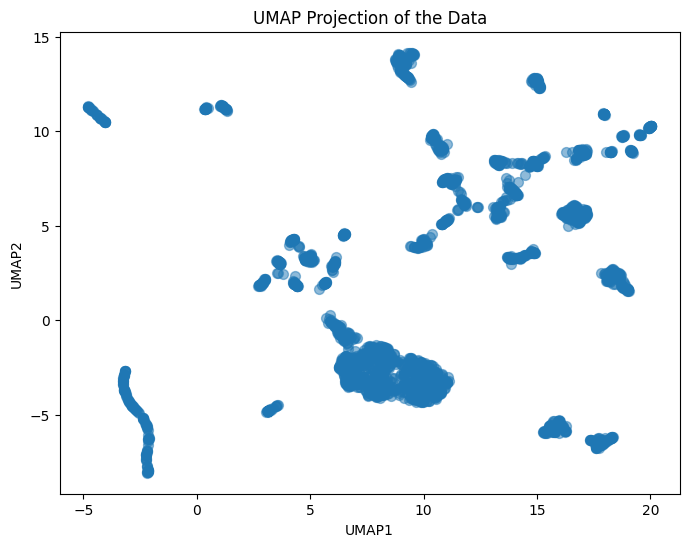

In [54]:
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(df_scaled)

umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])

plt.figure(figsize=(8, 6))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], s=50, alpha=0.5)
plt.title('UMAP Projection of the Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.savefig('umap_projection.svg', format='svg')
plt.show()

In [ ]:
umap_df.to_csv('umap_embeddings.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


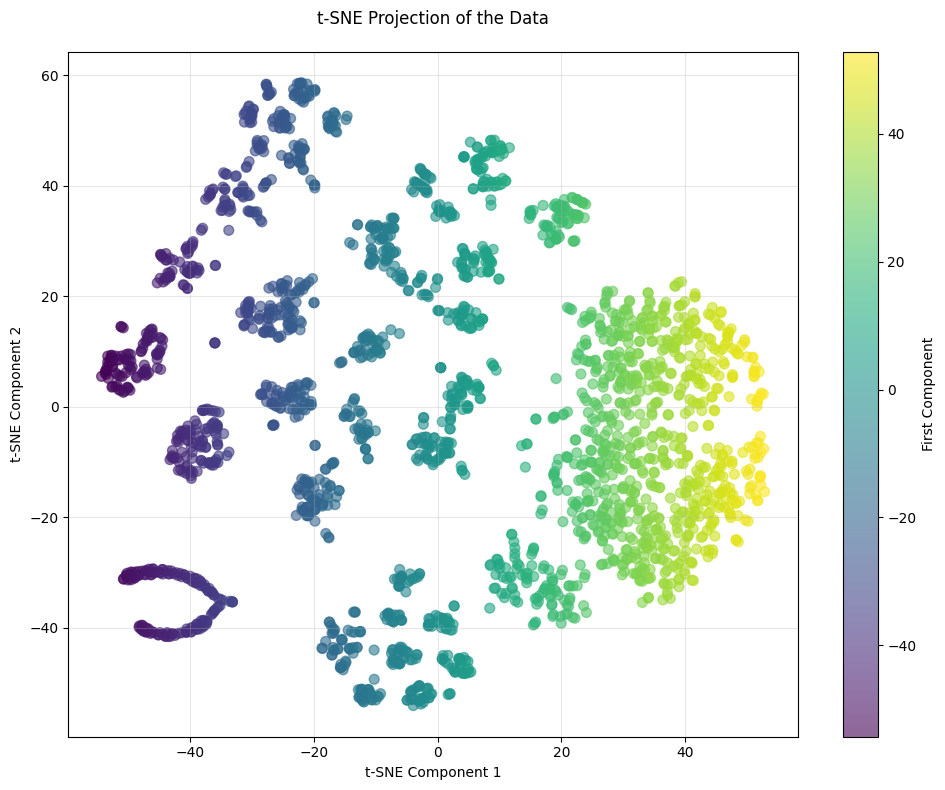

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


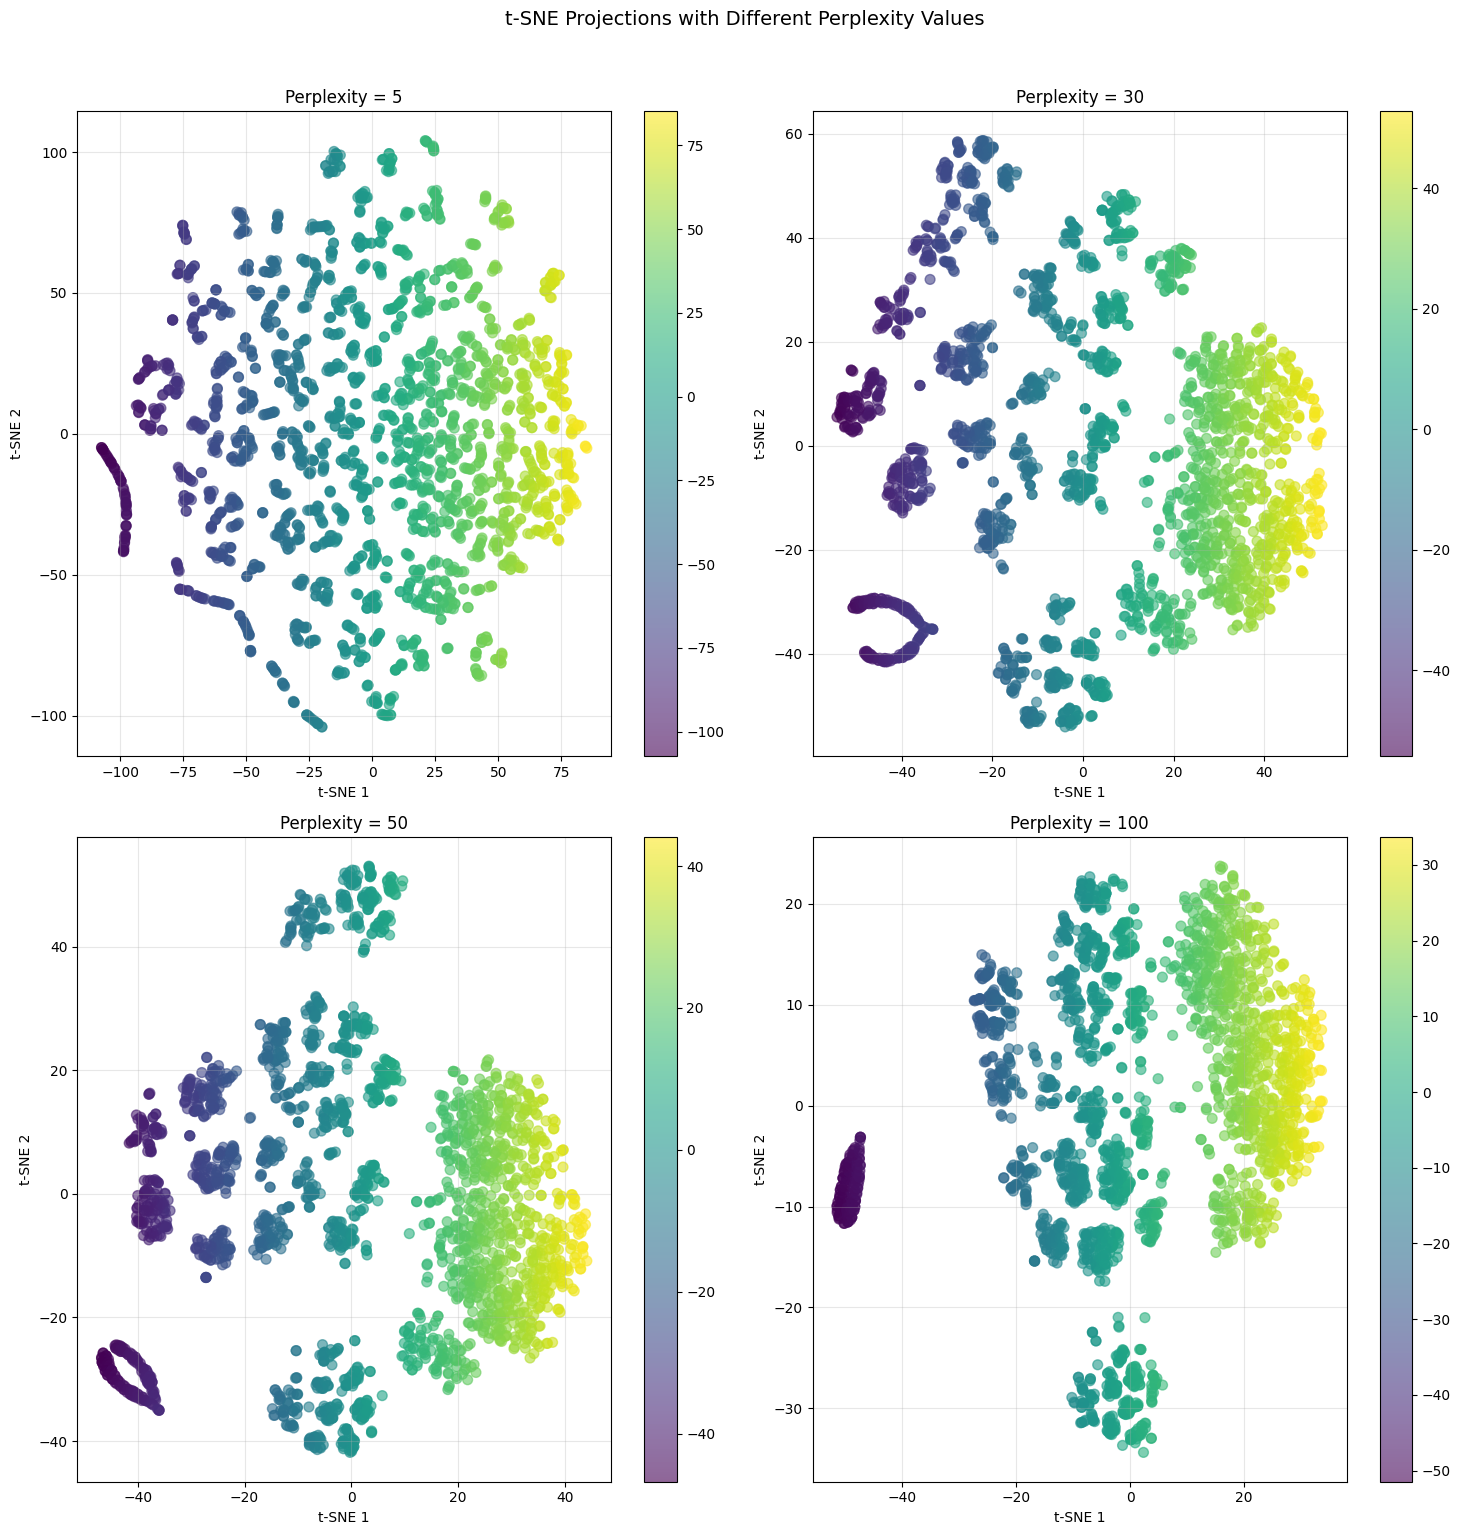

TypeError: plot_tsne() got an unexpected keyword argument 'max_iter'

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(df_scaled, perplexity=30, n_iter=1000, learning_rate='auto', random_state=42):
    """
    Create and plot t-SNE visualization with configurable parameters

    Args:
        df_scaled: Scaled dataframe
        perplexity: t-SNE perplexity parameter (default=30)
        n_iter: Number of iterations (default=1000)
        learning_rate: Learning rate (default='auto')
        random_state: Random seed for reproducibility
    """
    # Initialize and fit t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        n_iter=n_iter,
        learning_rate=learning_rate,
        random_state=random_state
    )

    # Transform the data
    tsne_results = tsne.fit_transform(df_scaled)

    # Create DataFrame with t-SNE results
    tsne_df = pd.DataFrame(
        data=tsne_results,
        columns=['tSNE1', 'tSNE2']
    )

    # Create visualization
    plt.figure(figsize=(10, 8))

    # Create scatter plot
    scatter = plt.scatter(
        tsne_df['tSNE1'],
        tsne_df['tSNE2'],
        s=50,
        alpha=0.6,
        c=tsne_results[:, 0],  # Color by first component
        cmap='viridis'
    )

    # Add colorbar
    plt.colorbar(scatter, label='First Component')

    # Add labels and title
    plt.title('t-SNE Projection of the Data', pad=20)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

    # Add grid for better readability
    plt.grid(True, alpha=0.3)

    # Adjust layout
    plt.tight_layout()

    # Save figure
    plt.savefig('tsne_projection.svg', format='svg', bbox_inches='tight', dpi=300)
    plt.show()

    return tsne_df, tsne

# Function to compare different perplexity values
def compare_perplexities(df_scaled, perplexities=[5, 30, 50, 100], random_state=42):
    """
    Create multiple t-SNE visualizations with different perplexity values
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.ravel()

    for idx, perp in enumerate(perplexities):
        # Fit t-SNE
        tsne = TSNE(
            n_components=2,
            perplexity=perp,
            n_iter=1000,
            learning_rate='auto',
            random_state=random_state
        )
        tsne_results = tsne.fit_transform(df_scaled)

        # Create scatter plot
        scatter = axes[idx].scatter(
            tsne_results[:, 0],
            tsne_results[:, 1],
            s=50,
            alpha=0.6,
            c=tsne_results[:, 0],
            cmap='viridis'
        )

        axes[idx].set_title(f'Perplexity = {perp}')
        axes[idx].set_xlabel('t-SNE 1')
        axes[idx].set_ylabel('t-SNE 2')
        axes[idx].grid(True, alpha=0.3)

        plt.colorbar(scatter, ax=axes[idx])

    plt.suptitle('t-SNE Projections with Different Perplexity Values', y=1.02, fontsize=14)
    plt.tight_layout()
    plt.savefig('tsne_perplexity_comparison.svg', format='svg', bbox_inches='tight', dpi=300)
    plt.show()

# Example usage:
# Basic t-SNE plot
tsne_df, tsne_model = plot_tsne(df_scaled)

# Compare different perplexity values
compare_perplexities(df_scaled)

# To use with specific parameters:
tsne_df, tsne_model = plot_tsne(
    df_scaled,
    perplexity=50,
    max_iter=2000,
    learning_rate='auto'
)